In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.drop('Car_Name', axis=1, inplace=True)

In [5]:
df.drop('Owner', axis=1, inplace=True)

In [6]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual


In [7]:
df['no_of_years']= 2021 -df['Year']

In [8]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,no_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,7


In [9]:
df.drop('Year', axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  301 non-null    float64
 1   Present_Price  301 non-null    float64
 2   Kms_Driven     301 non-null    int64  
 3   Fuel_Type      301 non-null    object 
 4   Seller_Type    301 non-null    object 
 5   Transmission   301 non-null    object 
 6   no_of_years    301 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 16.6+ KB


In [11]:
df.describe()

,Selling_Price,Present_Price,Kms_Driven,no_of_years
count,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,7.372093
std,5.082812,8.644115,38886.883882,2.891554
min,0.100000,0.320000,500.000000,3.000000
25%,0.900000,1.200000,15000.000000,5.000000
50%,3.600000,6.400000,32000.000000,7.000000
75%,6.000000,9.900000,48767.000000,9.000000
max,35.000000,92.600000,500000.000000,18.000000


In [12]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [13]:
df1= pd.get_dummies(df, drop_first=True)

In [14]:
df1.head()

,Selling_Price,Present_Price,Kms_Driven,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,7,0,1,0,1
1,4.75,9.54,43000,8,1,0,0,1
2,7.25,9.85,6900,4,0,1,0,1
3,2.85,4.15,5200,10,0,1,0,1
4,4.60,6.87,42450,7,1,0,0,1


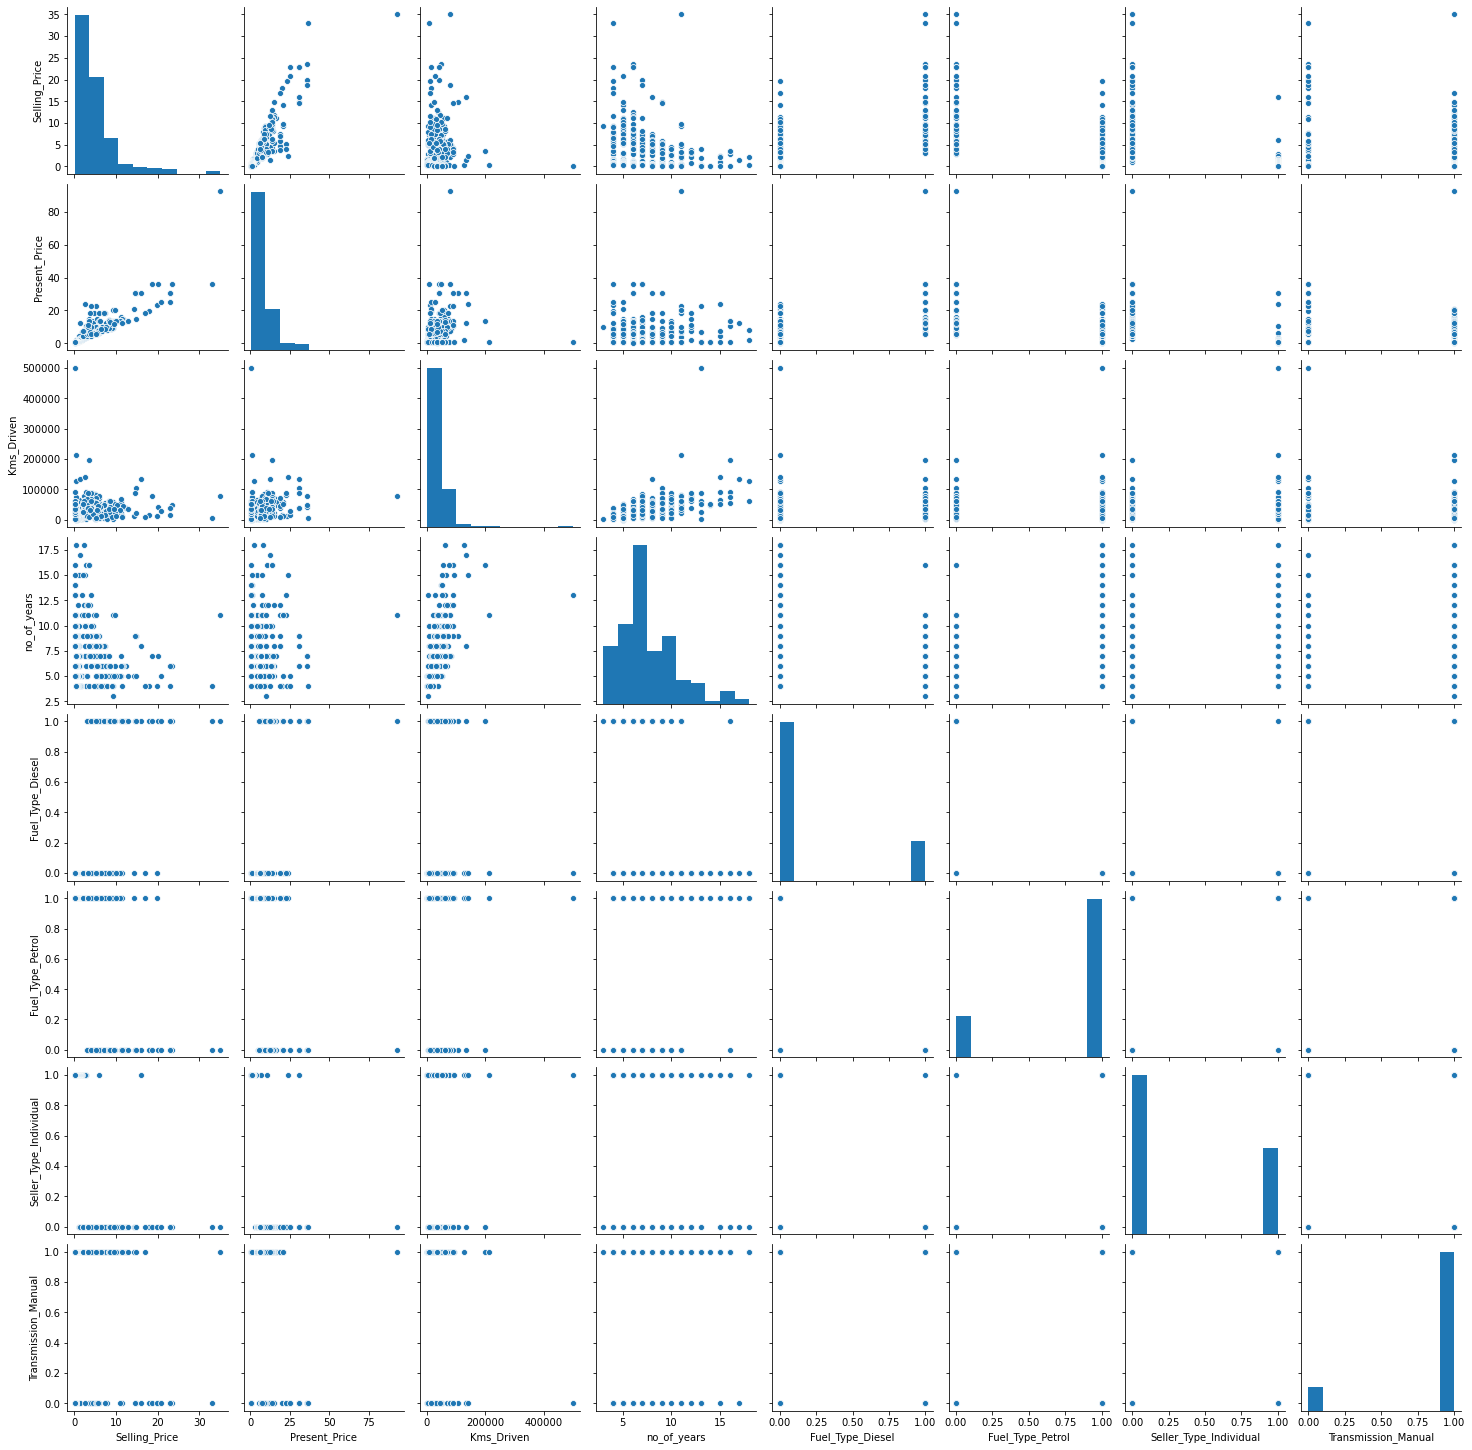

In [15]:
import seaborn as sns
sns.pairplot(df1)

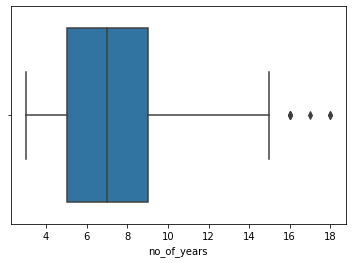

In [16]:

sns.boxplot(df1['no_of_years'])

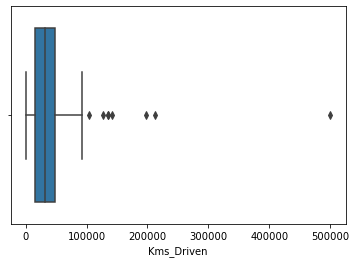

In [17]:
sns.boxplot(df1['Kms_Driven'])

In [18]:
df1.drop(df1[df1['Kms_Driven'] >300000].index ,inplace=True)


In [19]:
df1.shape

(300, 8)

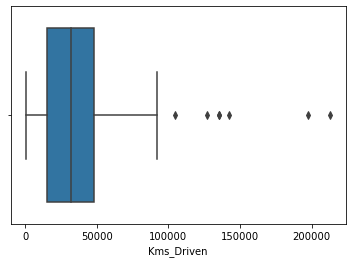

In [20]:
sns.boxplot(df1['Kms_Driven'])

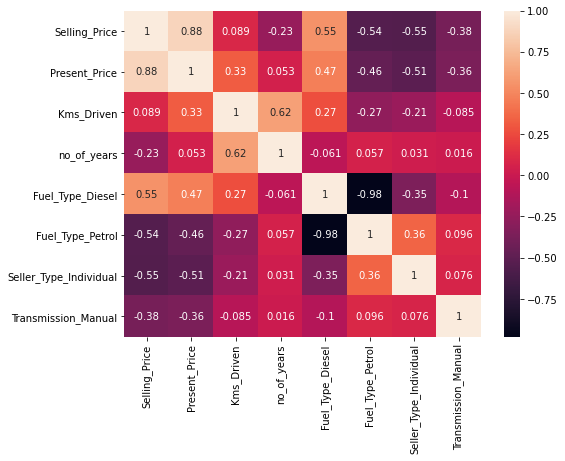

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(annot=True, data=df1.corr())

In [22]:
x= df1.drop('Selling_Price', axis=1)
y= df1['Selling_Price']

In [23]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=0)

In [24]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [25]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [26]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [27]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [28]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [29]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [30]:
predictions=rf_random.predict(x_test)

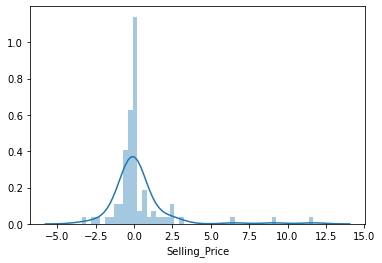

In [31]:
sns.distplot(y_test-predictions)

In [32]:
from sklearn import metrics

In [33]:

MSE = metrics.mean_squared_error(y_test, predictions)
print(MSE)
RMSE = np.sqrt(MSE)
print(RMSE)


3.8455800035033336
1.9610150441807768


In [34]:
R_square_score = (RMSE-1)*100
print(R_square_score)

96.10150441807768


# MODEL ACCURACY = 98.5%

In [36]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)